## 生成数据表

#### 生成迁移文件


- python manage.py makemigrations

  * 此时数据库中还没有表

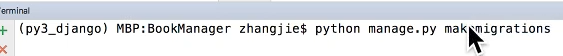

### 迁移文件

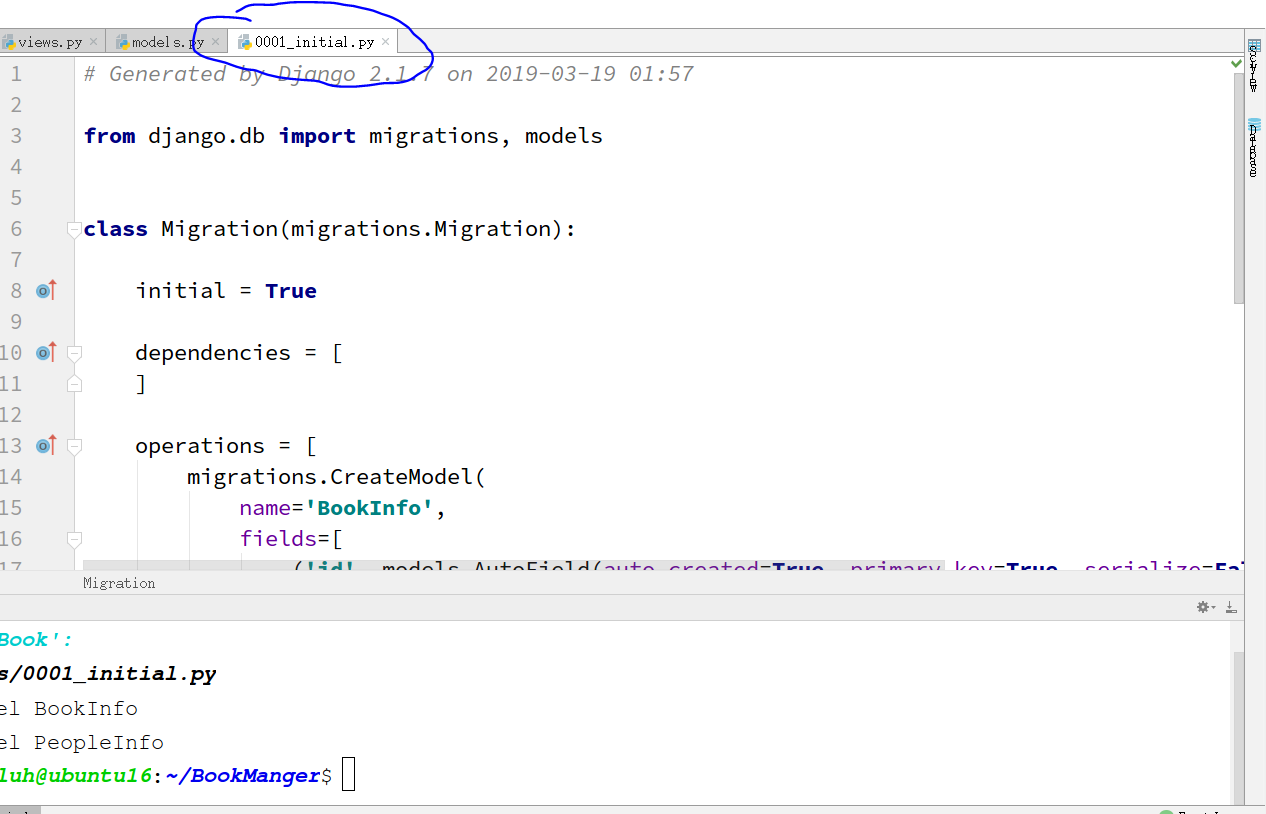

### 执行迁移文件

- python manage.py migrate
- 相当于执行SQL语句创建数据表



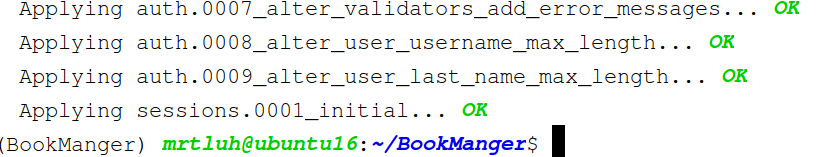

#         模型之站点管理



### 站点管理
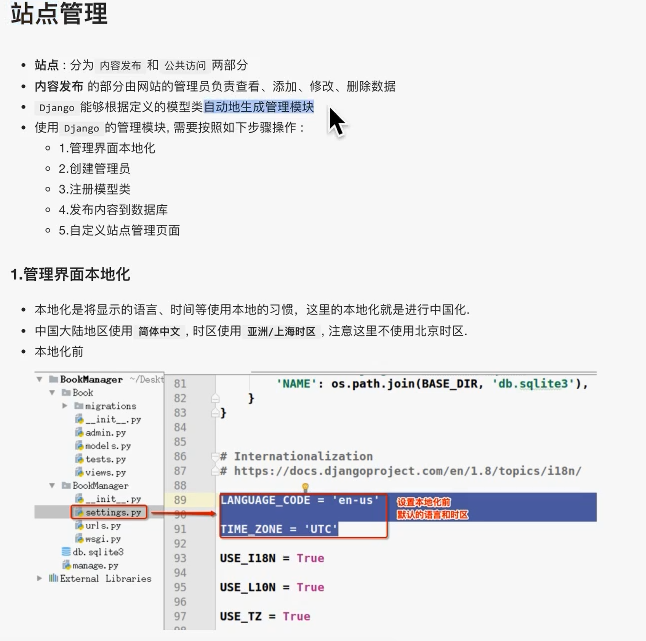

### settings.py 初始化时间和语言设置
- 语言由英文换成简体中文
   * LANGUAGE_CODE='zh-Hans'
   
- 时区:亚洲/上海时区
   * TIME_ZONE='Asia/Shanghai'

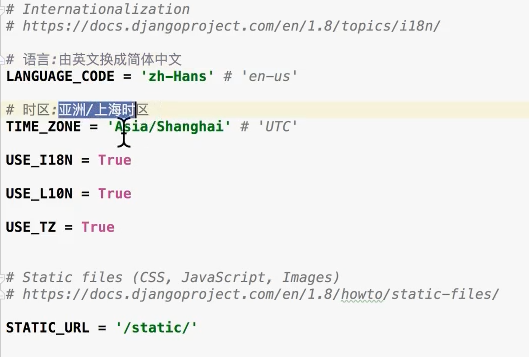

## 测试数据操作
- 进入到python shell 在终端执行python manage.py shell

- 引入包
   *   from myApp.models import Grades,Students
   *   from django.utils import timezone
   *   from datetime import *
   
- 查询所有的数据

   *   类名.objects.all()
   *   Grades.objects.all()

- 添加数据 本质创建一个模型类的对象实例
   *   grade1 = Grades()
   *   grade1.gname = "python04"
   *   grade1.gdate = datetime(year=2017,month=7,day=17)
   *   grade1.ggrilnum = 3
   *   grade1.gboynum = 70
   *   grade1.save()
   
- 查看某个对象

   *   类名.objects.get()
   *   Grades.objects.get()
   
- 修改数据  模型对象.属性 = 新值

   *   grade1.gboynum = 60
   *   grade1.save()
- 删除数据  模型对象.delete()

   *   grade2.delete()
   *   注意物理删除，数据库中的表里的数据被删除了
   
- 关联对象

   *   stu = Students()
   *   stu.sname = "薛艳梅"
   *   stu.sgender = False
   *   stu.sage = 20
   *   stu.scontend = "我叫薛艳梅"
   *   stu.sgrade = grade1
   *   stu.save()
   
 - 获得关联对象对象的集合
      *   需求:获取python04班级的所有学生
      *   对象名.关联类名的小写.set.all()
      *   grade1.students_set.all()
 - 需求:创建曾志伟，属于python04班级
      *   stu3 = grade1.students_set.create(sname = u"曾志伟",sgender=True,scontend = u"我叫曾志伟",sage = 45)
      

- 启动服务器 python manage.py runserver ip:port

   *   ip可以不写，不写的话代表本机IP
   *   端口默认是8000
   *   python manage.py runserver
   *   这是一个纯python写的轻量级的web服务器，仅仅在开发测试中使用

## 创建管理员
- 在settings.py文件中INSTALLED_APPS中添加 'django.contrib.admin',
- 创建管理员
    * python manage.py createsuperuser
- 用户名
    * admin
- 邮箱
    * 随便写，但是必须邮箱格式
- 密码

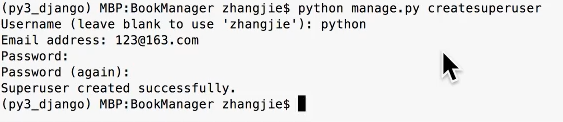


#### 启动项目
    * python manage.py runserver
    * 找到BookManager中的urls.py中的urlpatterns=
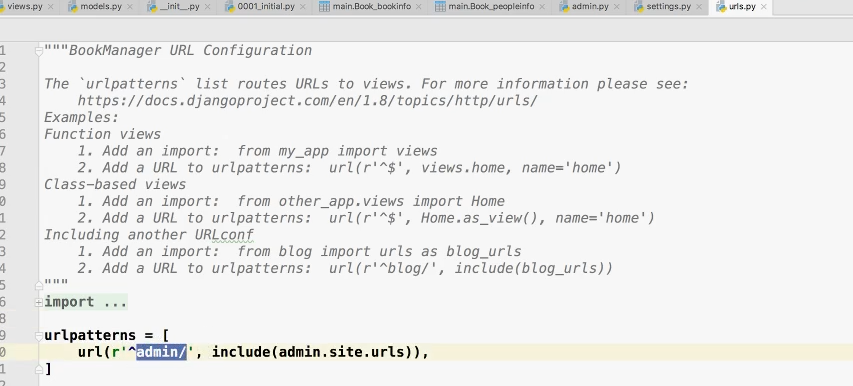

### 注册模型类
- 在admin中导入信息，并注册模型类

        from django.contrib import admin



        # Register your models here.

        # 导入包

        from .models import Grades,Students



        # 注册

        class GradesAdmin(admin.ModelAdmin):

            # 列表属性



            # 显示字段

            list_display = ['pk','gname','gdate','ggrilnum',

                            'gboynum','isDelete']

            # 添加过滤器

            list_filter = ['gname']

            # 搜索字段

            search_fields =['gname']

            # 分页属性

            list_per_page = 5



            # 添加、修改页属性，注意 fields 和 fieldsets 不同时使用

            # fields = ['ggrilnum','gboynum','gname','gdate',

            # 		  'isDelete']  # 属性的先后顺序

            #

            fieldsets = [

                ('num',{'fields':['ggrilnum','gboynum']}),

                ('base',{'fields':['gname','gdate','isDelete']})

            ]



        class StudentsAdmin(admin.ModelAdmin):

            list_display = ['pk','sname','sage','sgender','scontend',

                            'sgrade','isDelete']

            list_per_page = 2

### 注册
        admin.site.register(Grades,GradesAdmin)

        admin.site.register(Students)
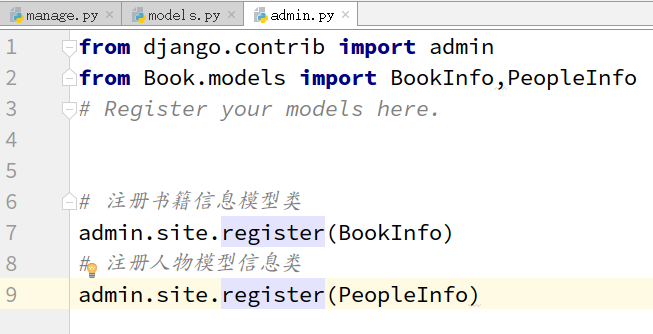

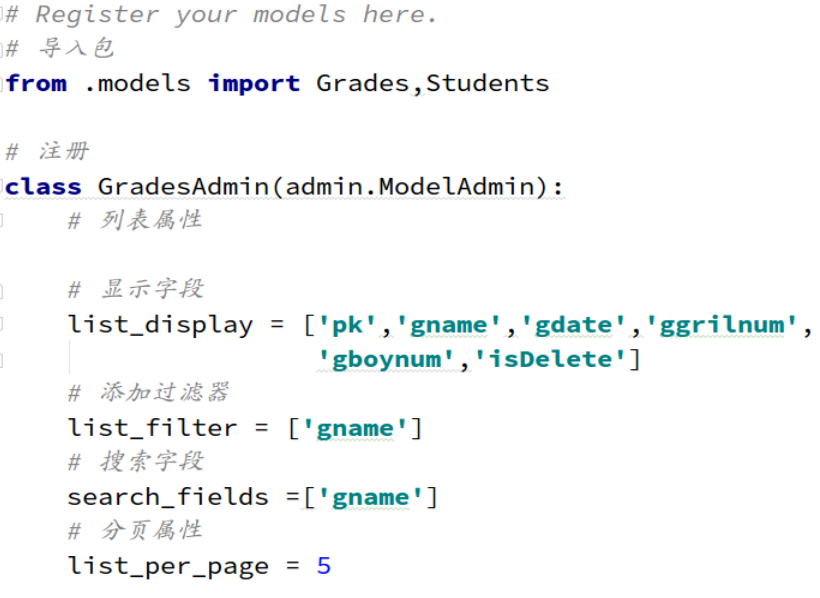

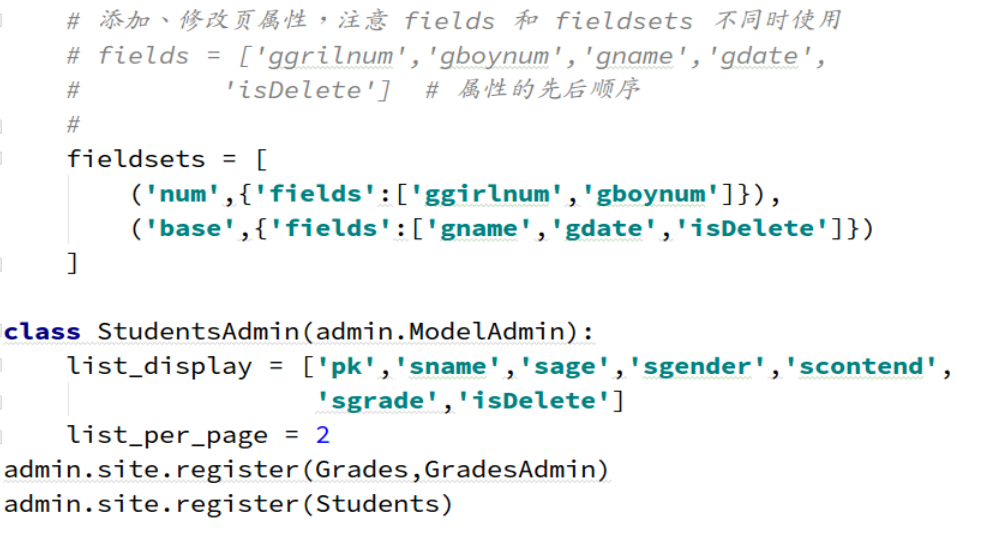